<a href="https://colab.research.google.com/github/avinashmane/colab/blob/master/strava_likers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code/Parameters
* Setup
    * needs
        * auth
        * gsheet auth
        * cfg_strava
* updates sheets
* Todo
    * low: error: location not found 

## Config

In [3]:
repo='https://github.com/avinashmane/colab.git'
import os,sys
if os.name=='nt':
    LIB= r'c:\m\lib'
    LOG= r'c:\m\social-media-automation'
    AUTH= r'c:\i\auth'
    sys.path.append("./lib")
else:
    if not os.path.exists('drive'):
        from google.colab import drive
        drive.mount('/content/drive')
    LIB='/content/drive/MyDrive/m/lib'
    LOG='/content/drive/MyDrive/m/lib'
    AUTH='/content/drive/MyDrive/m/auth'
    if not os.path.exists('m'):
      !ln -sd '/content/drive/MyDrive/m/' m
    if not os.path.exists('repo'):
      !git clone $repo repo
    sys.path.append('repo')
    sys.path.append("repo/lib")
sys.path.append(LIB)

In [4]:
import yaml
cfg=yaml.load(u"""
repo:
    https://github.com/avinashmane/colab.git
packages: 
    chromium-chromedriver
modules:
    nerodia
    pygsheets
env:
    nt:
        LIB: c:/m/lib
        LOG: c:/m/social-media-automation
        AUTH: c:/i/auth
    posix:
        LIB: /content/drive/MyDrive/m/lib
        LOG: /content/drive/MyDrive/m/lib
        AUTH: /content/drive/MyDrive/m/auth
sheets:
    stravasync:
        url: https://docs.google.com/spreadsheets/d/1Q8SA641P0aytWzPGmeHG_xuxll3Wq6phsxjb91RjgWY/edit#gid=0
        tab: Members
        range: A10:O
    StravaPromoLog:
        url: https://docs.google.com/spreadsheets/d/1Q8SA641P0aytWzPGmeHG_xuxll3Wq6phsxjb91RjgWY/edit#gid=0
        tab: StravaPromoLog
        
""",Loader=yaml.Loader)
for x in cfg['env'][os.name]: 
    os.environ[x]=eval(x)

import importlib
import utils
importlib.reload(utils)
utils.setup_env(cfg['packages'],cfg['modules'])

'Environment setup'

## Code

In [89]:
import pandas as pd
import gsheets
import importlib
from datetime import datetime
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image

import utils

import socialmediasite 
importlib.reload(socialmediasite)
Strava=socialmediasite.Strava
SocialMediaSite=socialmediasite.SocialMediaSite

In [7]:
df_mc=gsheets.Gsheet(cfg['sheets']['stravasync']['url']).getSheetDf('StravaPromoLog','A1')
df_mc.loc[(df_mc.status=='nonMember') ].drop_duplicates('athlete').location.value_counts().head(20)

 · Haveli, India               22
 · Pune City, India            17
 · Pune City, Maharashtra       9
 · Haveli, Maharashtra          8
 · Bengaluru, India             4
 · Mumbai, India                3
 · Mulshi, India                3
 · Navi Mumbai, Maharashtra     3
 · Mumbai, Maharashtra          2
 · Kalyan - Dombivli, India     2
 · Anekal, India                2
 · Kolhapur, India              2
 · Mulshi, Maharashtra          2
                                2
 · Chesterfield, Missouri       1
 · Punalur, India               1
 · Milan, Italy                 1
 · Kanpur, India                1
 · Walwa, India                 1
 · Laikipia, Kenya              1
Name: location, dtype: int64

In [10]:
df_mc.loc[(df_mc.status=='nonMember') 
          & df_mc.location.isin([#' · Pune City, Maharashtra',' · Pune City, India',
                                 ' · Haveli, Maharashtra', ' · Haveli, India',
                                 # ' · Mulshi, Maharashtra',' · Mulshi, India'
                                ])].drop_duplicates('athlete',keep='last') #Haveli

,SrNo,Timestamp,fn,status,athlete,name,activity,location
4,2022-08-05 15:08:20,INFO,giveKudos,nonMember,https://www.strava.com/athletes/3865939,PT India,https://www.strava.com/activities/7584875290,"· Haveli, Maharashtra"
53,2022-08-08 08:17:53,INFO,giveKudos,nonMember,https://www.strava.com/athletes/46844799,RAVI CHAUDHARY,https://www.strava.com/activities/7601047813,"· Haveli, Maharashtra"
59,2022-08-08 08:18:04,INFO,giveKudos,nonMember,https://www.strava.com/athletes/65596802,Just.Rishab 🦊,https://www.strava.com/activities/7601022163,"· Haveli, Maharashtra"
63,2022-08-08 08:18:42,INFO,giveKudos,nonMember,https://www.strava.com/athletes/77482065,aniket chavan,https://www.strava.com/activities/7601016061,"· Haveli, Maharashtra"
114,2022-08-08 08:54:57,INFO,giveKudos,nonMember,https://www.strava.com/athletes/67296665,vijay 24,https://www.strava.com/activities/7601094052,"· Haveli, Maharashtra"
156,2022-08-09 04:24:53,INFO,giveKudos,nonMember,https://www.strava.com/athletes/42476718,Mihika Athalye,https://www.strava.com/activities/7606442735,"· Haveli, India"
187,2022-08-09 04:26:55,INFO,giveKudos,nonMember,https://www.strava.com/athletes/80955627,Ashish Chandavale,https://www.strava.com/activities/7606325766,"· Haveli, India"
195,2022-08-09 04:27:42,INFO,giveKudos,nonMember,https://www.strava.com/athletes/37949942,Amit B,https://www.strava.com/activities/7606352803,"· Haveli, India"
206,2022-08-09 04:30:03,INFO,giveKudos,nonMember,https://www.strava.com/athletes/39095579,Gaurav Kedar,https://www.strava.com/activities/7606485484,"· Haveli, India"
208,2022-08-09 04:30:06,INFO,giveKudos,nonMember,https://www.strava.com/athletes/50242940,ranjeet gurung,https://www.strava.com/activities/7606462388,"· Haveli, India"


# Process
## Create headless

In [120]:
" Test Selenium headless"
if True:
    if os.name=='nt':
        b=Browser('chrome',)
    else:
        
        # import sys
        # sys.path.insert(0,f'{DIR}/geckodriver')
        from selenium import webdriver

        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        # b =webdriver.Chrome('chromedriver',options=chrome_options)
        b=Browser('chrome',options=chrome_options,)
    # b.get("https://www.google.com")
    utils.setLogger(f"{LOG}/strava-automation.log")
    # ss = Gsheet('stravasync').getSheetByTitle('StravaPromoLog')

2022-08-16 01:15:28:INFO:Logger file: c:\m\social-media-automation/strava-automation.log


In [121]:
# %debug
# if os.name=='nt':
strava=Strava(b,authFile=f'{AUTH}/auth.yaml',cfgFile=f"{LIB}/cfg_strava.yaml")
# else:
#   strava=Strava(b,authFile=r'/content/drive/MyDrive/m/auth/auth.yaml',cfgFile="/content/drive/MyDrive/m/social-media/cfg_strava.yaml")
# test case
# strava.login("avinash")

In [122]:
strava.login("mileage_league_strava")

In [118]:
nerodia.default_timeout=3
strava.logout()

TimeoutError: timed out after 3 seconds, waiting for true condition on #<LI: located: False; {'class_name': 'user-menu', 'tag_name': 'li'}>

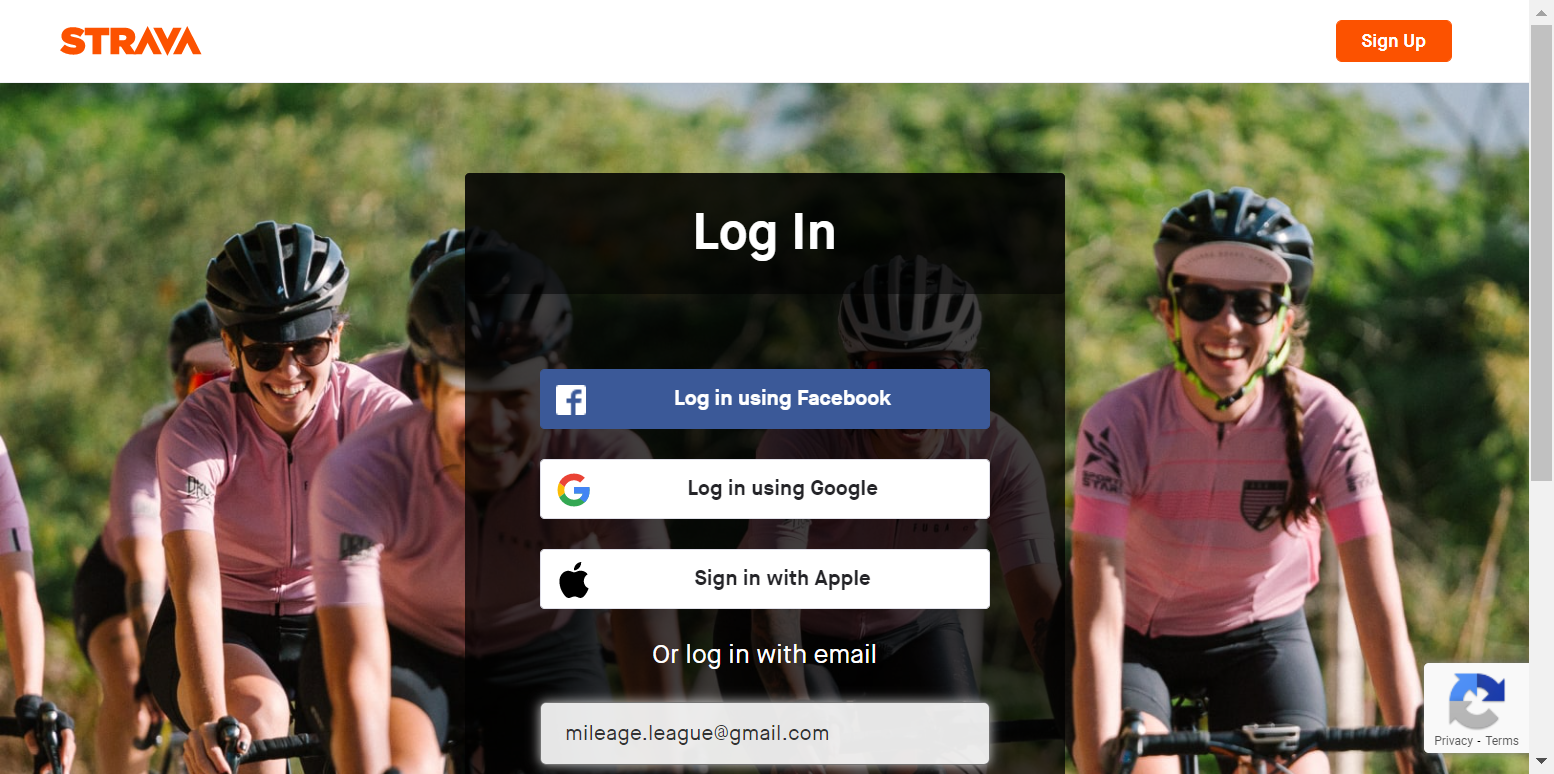

In [21]:
Image(b.screenshot.png())

## A. Give likes in feed

## Give likes on Club

In [16]:
# b.goto('https://www.strava.com/clubs/196654/recent_activity')
strava.login("strava_pcmcrunners")
logging.info(f"Total number of cards on {strava.browser.title}: {len(b.divs(class_name=re.compile('^Card')))}")


2022-08-08 08:54:28:INFO:Total number of cards on Dashboard | Strava: 19


# Test

In [63]:
## Comment on PCMC club
strava.goto("https://www.strava.com/clubs/196654/recent_activity")

WebDriverException: Message: chrome not reachable
  (Session info: chrome=104.0.5112.80)


In [19]:
card=strava.getParent(x1[0],'div','^Card')

NameError: name 'x1' is not defined

In [ ]:
card.text
[x.link().text for x in [card.div(class_name=re.compile("^MediaBody--media-body--"))]]

In [ ]:
KudosButtons=strava.browser.buttons(title=strava.giveKudosPattern)
for i,x in enumerate(KudosButtons):
  try:
    card=strava.getParent(x,'div','^Card')
    athId,ath=SocialMediaSite.getLinkByClassPatt(card,"^Avatar--")
    actId,_=SocialMediaSite.getLinkByClassPatt(card,"^ActivityEntryBody--")
    for x in card.divs(class_name=re.compile("^MediaBody--media-body--")):
        name=x.link().text
        if x.exists:
            locEl=x.div(class_name=re.compile('^LocationAndTime--location--',)).wait_until(timeout=0.1, method=lambda _: True)
            loc=locEl
    # text=card.text.split(',')[:1]
    print(name,loc)
    # x.click() 
    try:
        x = int(re.findall(".*\/([0-9]*)",athId)[0])
        if x not in StravaMembers:
            x='nonMember'
    except:
        x='not valid'

    # self.browser.execute_script("arguments[0].click();", x)
    ss.append_table([[pd.Timestamp.now().isoformat(),"INFO","Comments",x,athId,name,actId,loc,]])    
    logging.info(f"giveKudos: {i},{x} {athId} {actId} {name}")
  except Exception as e: 
    logging.warning(f"giveKudos: {i} error clicking {e!r}")


In [ ]:
b.link(href="#container-nav").click()

In [ ]:
b.button(title="Expand profile menu").hover()

In [ ]:
[(x.text,x.class_name,x.tag_name) for x in b.button(title="Expand profile menu").span().span()]

In [ ]:
# b.execute_script("window.scrollTo(0,0)")
# Image(b.screenshot.png())
re.findall(".*\/([0-9]*)","https://www.strava.com/athletes/27331750")[0]

In [ ]:
"get all attributes"
# for x in dir(b):
#   print(x,type(getattr(b,x)),)

# New section


In [25]:
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        self.assertEqual(5, 5)
        

unittest.main(argv=[''], verbosity=2, exit=False)


test_add (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [26]:
?unittest

Type:        module
String form: <module 'unittest' from 'c:\\sw\\python37\\lib\\unittest\\__init__.py'>
File:        c:\sw\python37\lib\unittest\__init__.py
Docstring:  
Python unit testing framework, based on Erich Gamma's JUnit and Kent Beck's
Smalltalk testing framework (used with permission).

This module contains the core framework classes that form the basis of
specific test cases and suites (TestCase, TestSuite etc.), and also a
text-based utility class for running the tests and reporting the results
 (TextTestRunner).

Simple usage:

    import unittest

    class IntegerArithmeticTestCase(unittest.TestCase):
        def testAdd(self):  # test method names begin with 'test'
            self.assertEqual((1 + 2), 3)
            self.assertEqual(0 + 1, 1)
        def testMultiply(self):
            self.assertEqual((0 * 10), 0)
            self.assertEqual((5 * 8), 40)

    if __name__ == '__main__':
        unittest.main()

Further information is available in the bundled documen

In [27]:
import mocha

ModuleNotFoundError: No module named 'mocha'

In [ ]:
errorr not further

In [4]:
import yaml
import time
from datetime import datetime
import os
from nerodia.browser import Browser
import nerodia
import re
import logging
from IPython.display import Image

def setLogger(logFile=None,level=logging.INFO):
    # level = logging.INFO if level is None else 
    from imp import reload
    # jupyter notebook already uses logging, thus we reload the module to make it work in notebooks
    # http://stackoverflow.com/questions/18786912/get-output-from-the-logging-module-in-ipython-notebook
    reload(logging)
    logging.basicConfig( level=level,
                    format='%(asctime)s:%(levelname)s:%(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')
                    
    if logFile:
        logger = logging.getLogger()
        fhandler = logging.FileHandler(filename=logFile, mode='a',encoding='utf-8')
        formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s'
                                     ,datefmt='%Y-%m-%d %H:%M:%S')
        fhandler.setFormatter(formatter)
        logger.addHandler(fhandler)
        logger.setLevel(level)
        
    logging.info("Logger file: "+logFile if logFile else "None")


class SocialMediaSite:
    "Generic website"
    authType=None
    cfg={}

    giveKudosPattern=re.compile(r'.*ive kudos')    
    def __init__(self,b,browser='firefox',authFile=f'{AUTH}/auth.yaml'):
        # create brwoser unless provided
        self.browser=Browser(browser) if b==None else b
        nerodia.default_timeout=10
        with open(authFile) as file:
            # The FullLoader parameter handles the conversion from YAML
            # scalar values to Python the dictionary format
            auth = yaml.safe_load(file)
            self.auth={x:auth[x] for x in auth if x in ['strava','facebook']}
        
    def login():
      raise NotImplemented
      
    def loadCookie(self,cookieFile):
        if cookieFile and os.path.exists(cookieFile):
          self.browser.cookies.load(file=cookieFile)
          
    def saveCookie(self,cookieFile):
        return self.browser.cookies.save(file=cookieFile)
    def clearCookie(self,cookieFile):
        return self.browser.cookies.clear()
    def close(self):
        return self.browser.close()
    @staticmethod
    def getParent(el,tag,patClass):
      """
      Get parents with tag and patterm of class matching
      Parameters
      ----------
      - el : reference node
      - tag : tag_type (e.g. div)
      - patClass : class of patterns (re.compile)
      Returns
      -------
      - Single element than meets the requirements
      """
      return el._xpath_adjacent( tag_name='div',class_name=re.compile(patClass), adjacent='ancestor', plural=False)
    
    @staticmethod
    def getLinkByClassPatt(tag,classPattern): 
        x= tag.link(class_name=re.compile(classPattern))
        return x.href,x.text
    
    @staticmethod
    def _dumptag(el,tags=None,level=0):
      for c in el.children(tag_name=tags):
          print(' '*level,c.tag_name,c.id,c.text[:50])
          SocialMediaSite._dumptag(c,level+1)
    
        

In [126]:
# from __future__ import print_statement
# !pip install swagger_client
import time
import swagger_client
from swagger_client.rest import ApiException
from pprint import pprint

# Configure OAuth2 access token for authorization: strava_oauth
swagger_client.configuration.access_token = 'YOUR_ACCESS_TOKEN'

# create an instance of the API class
api_instance = swagger_client.AthletesApi()
id = 789 # Long | The identifier of the athlete. Must match the authenticated athlete.

try: 
    # Get Athlete Stats
    api_response = api_instance.getStats(id)
    pprint(api_response)
except ApiException as e:
    print("Exception when calling AthletesApi->getStats: %s\n" % e)

ModuleNotFoundError: No module named 'swagger_client'